<a href="https://colab.research.google.com/github/W8Yi/MSML505/blob/main/MSML605HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Main object**: for this project we want to use various health attribute to predict heart disease for a person. We will be using a binary classification model

**Attribute Information**
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]



In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.model_selection import train_test_split

databaseAdrress = 'https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction'
input_file = "/content/heart.csv"

df = pd.read_csv(input_file, header = 0)
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [2]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


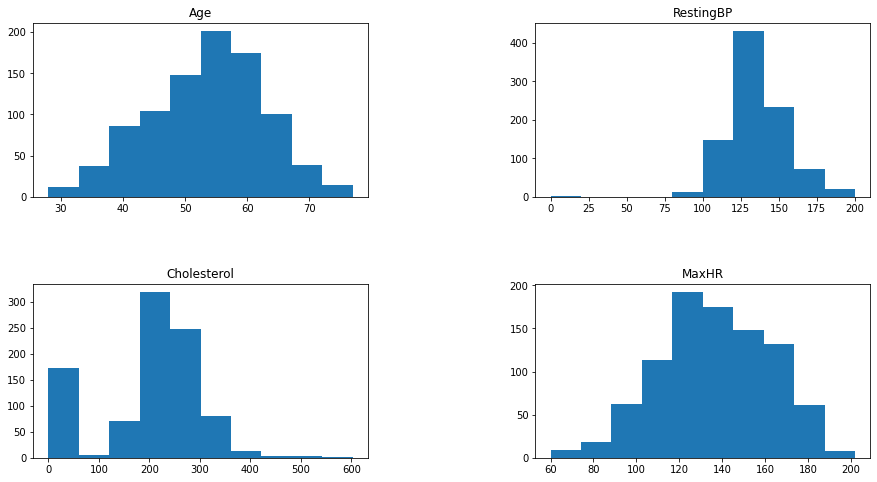

In [3]:
dist1 = df['Age']
dist2 = df['RestingBP']
dist3 = df['Cholesterol']
dist4 = df['MaxHR']
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axs[0][0].hist(dist1)
axs[0][1].hist(dist2)
axs[1][0].hist(dist3)
axs[1][1].hist(dist4)

#plt.setp(axs[0, 0], xlabel='age')
#plt.setp(axs[0, 0], ylabel='number')

axs[0][0].set_title('Age')
axs[0][1].set_title('RestingBP')
axs[1][0].set_title('Cholesterol')
axs[1][1].set_title('MaxHR')
plt.show()

From this graph, we can observe that most of people are from age 50-60. Most common RestingBP is around 130-140. And for MaxHR, most people have around 130.

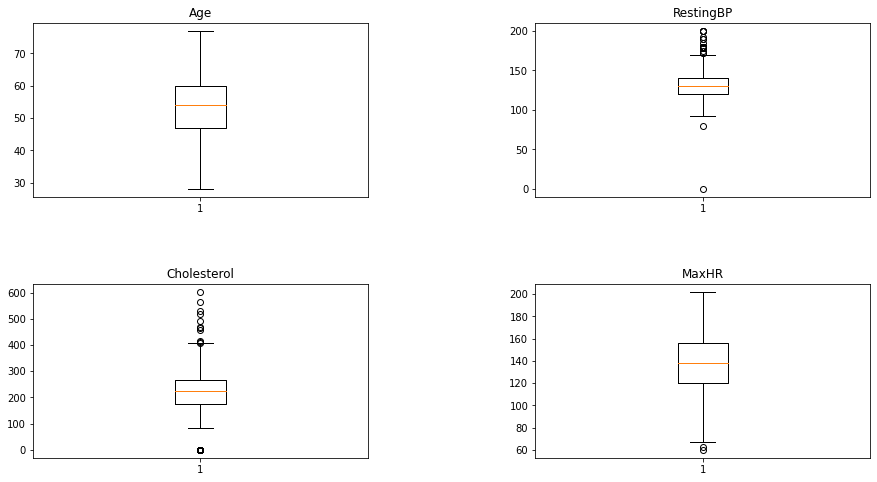

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axs[0][0].boxplot(dist1)
axs[0][1].boxplot(dist2)
axs[1][0].boxplot(dist3)
axs[1][1].boxplot(dist4)

axs[0][0].set_title('Age')
axs[0][1].set_title('RestingBP')
axs[1][0].set_title('Cholesterol')
axs[1][1].set_title('MaxHR')

plt.show()

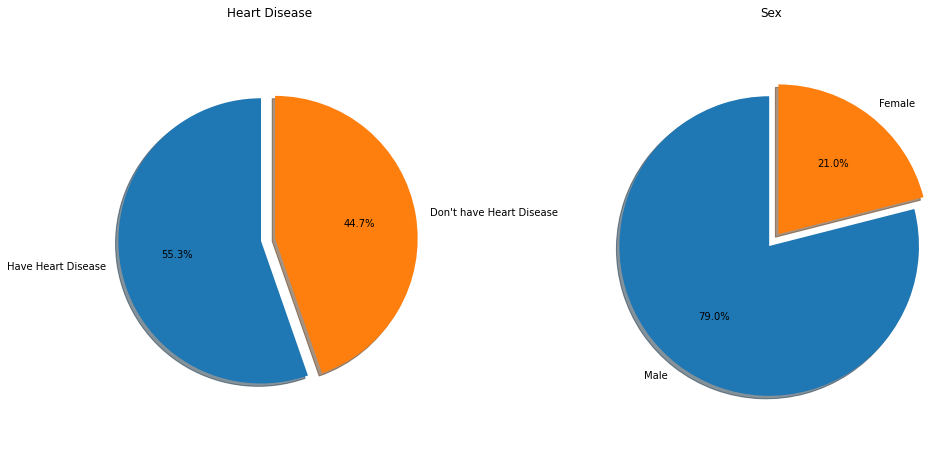

In [4]:
labels = 'Have Heart Disease', "Don't have Heart Disease"
sizes = [df[df['HeartDisease'] == 1].shape[0], df[df['HeartDisease'] == 0].shape[0]]

labels2 = 'Male', "Female"
sizes2 = [df[df['Sex'] == 'M'].shape[0], df[df['Sex'] == 'F'].shape[0]]

fig1, ax1 = plt.subplots(1,2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
explode = (0, 0.1)
ax1[0].pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
ax1[0].axis('equal')

ax1[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
ax1[1].axis('equal')

ax1[0].set_title('Heart Disease')
ax1[1].set_title('Sex')

plt.show()

Almost half and half of have heart disease and don't have for this sample. 79% of these samples are male and 21% are female. We do have a unbalanced sex distribution. 

Then, we want to preprocess the data for our training session. Since there are different type of ChestPainType or other attributes that are not numerical. We want to transfer them into individual indicators 

In [14]:
df1 = pd.get_dummies(df['Sex'])
df2 = pd.get_dummies(df['ChestPainType'], prefix='ChestPainType')
df3 = pd.get_dummies(df['RestingECG'], prefix='RestingECG')
df4 = pd.get_dummies(df['ExerciseAngina'], prefix='ExerciseAngina')
df5 = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope')

df_fin = pd.concat([df, df1, df2, df3, df4, df5], axis=1).reindex(df.index)
df_fin.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)
 
df_fin

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


As we can see, our database is now all numerics and we can now start to train it. 

First, we will divide our database into training and testing parts.

In [61]:
Y = df_fin['HeartDisease']
x = df_fin.drop('HeartDisease', axis=1)
minmax = preprocessing.MinMaxScaler()
minmax.fit(x)
x = minmax.transform(x)

train_x, test_x, train_y, test_y = train_test_split(x,Y,test_size=0.2,random_state=42)



Here we tried three different models: Linear Regression, logistic Regression and SVM. 

In [73]:
LR = LinearRegression()
LR.fit(train_x, train_y)

pred_y = np.round(LR.predict(test_x))
mse = metrics.mean_squared_error(test_y, pred_y)

TN, FP, FN, TP = metrics.confusion_matrix(test_y, pred_y).ravel()

print('True Positive  = ', TP)
print('False Positive = ', FP)
print('True Negative  = ', TN)
print('False Negative = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy for Linear Regression is {}'.format(accuracy))

True Positive  =  96
False Positive =  10
True Negative  =  70
False Negative =  7
Accuracy for Linear Regression is 0.907103825136612


In [79]:
LR2 = LogisticRegression()
LR2.fit(train_x, train_y)

pred_y2 = np.round(LR2.predict(test_x))
mse2 = metrics.mean_squared_error(test_y, pred_y2)

TN2, FP2, FN2, TP2 = metrics.confusion_matrix(test_y, pred_y2).ravel()

print('True Positive  = ', TP2)
print('False Positive = ', FP2)
print('True Negative  = ', TN2)
print('False Negative = ', FN2)

accuracy2 =  (TP2+TN2) /(TP2+FP2+TN2+FN2)

print('Accuracy for Logistic Regression is {}'.format(accuracy2))

True Positive  =  94
False Positive =  10
True Negative  =  70
False Negative =  9
Accuracy for Logistic Regression is 0.8961748633879781


In [82]:
clf = svm.SVC()
clf.fit(train_x, train_y)

pred_y3 = np.round(clf.predict(test_x))
mse3 = metrics.mean_squared_error(test_y, pred_y3)

TN3, FP3, FN3, TP3 = metrics.confusion_matrix(test_y, pred_y3).ravel()

print('True Positive  = ', TP3)
print('False Positive = ', FP3)
print('True Negative  = ', TN3)
print('False Negative = ', FN3)

accuracy3 =  (TP3+TN3) /(TP3+FP3+TN3+FN3)

print('Accuracy for SVM is {}'.format(accuracy3))

True Positive  =  93
False Positive =  14
True Negative  =  66
False Negative =  10
Accuracy for SVM is 0.8688524590163934


By comparison, we found linear Regression produce the best result, logistic gets slightly worse result and SVM gives the worst accuracy. I think the reason might because the relation between features and label is linear, and model with higher complexity might perform worse. 